# Profitable App Profiles for the Google Play Market

Our aim in this project is to find mobile app profiles that are profitable for the Google Play market. We're working as data analysts for a company that builds Android mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

* [A data set](https://www.kaggle.com/lava18/google-play-store-apps/home) containing data about approximately ten thousand Android apps from Google Play

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
android=pd.read_csv("googleplaystore.csv")

In [3]:
android.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
android.shape

(10841, 13)

In [5]:
10841*13

140933

In [6]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# ## Renaming few features(rename columns name)
# df.rename(columns={'Last Updated': 'Lastupdated','Content Rating':'ContentRating','Current Ver': 'CurrentVer','Android Ver':\
#                    'AndroidVer'},inplace=True)

In [8]:
android.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
android.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [10]:
android.drop(10472,axis=0,inplace=True)

In [11]:
android.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [12]:
android["App"].head()

0       Photo Editor & Candy Camera & Grid & ScrapBook
1                                  Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                Sketch - Draw & Paint
4                Pixel Draw - Number Art Coloring Book
Name: App, dtype: object

In [13]:
android.duplicated(["App"]).sum()

1181

In [14]:
bol=android.duplicated(["App"])
android[bol]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [15]:
android["App"]=="Coloring book moana"

0        False
1         True
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: App, Length: 10840, dtype: bool

In [16]:
android[android["App"]=="Coloring book moana"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [17]:
android.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [18]:
android["Reviews"]=android["Reviews"].astype(float)

In [19]:
android.sort_values("Reviews", ascending=False, inplace=True)

In [20]:
android[android["App"]=="Coloring book moana"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2033,Coloring book moana,FAMILY,3.9,974.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [21]:
android[android["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [22]:
android.drop_duplicates(["App"], inplace=True)

In [23]:
android.shape

(9659, 13)

In [24]:
android["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [25]:
android["Type"].value_counts(dropna=False)

Free    8904
Paid     754
NaN        1
Name: Type, dtype: int64

In [26]:
android=android[android["Type"]=="Free"]

In [27]:
android.shape

(8904, 13)

In [28]:
android["App"].sort_values().tail(20)

6006                          বাংলা টিভি প্রো BD Bangla TV
9200                                             বাংলাflix
1592                သိင်္ Astrology - Min Thein Kha BayDin
3960                          ► MultiCraft ― Free Miner! 👍
5569                              【Miku AR Camera】Mikuture
321      【Ranobbe complete free】 Novelba - Free app tha...
6418                                         あなカレ【BL】無料ゲーム
9466                       パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）
5513                                           中国語 AQリスニング
1488     乐屋网: Buying a house, selling a house, renting ...
3824     乗換NAVITIME　Timetable & Route Search in Japan T...
10109                                              哈哈姆特不EY
5698                                                日本AV历史
313                    漫咖 Comics - Manga,Novel and Stories
9222                                    英漢字典 EC Dictionary
6420                                           감성학원 BL 첫사랑
6334                               뽕티비 - 개인방송, 인터넷방송, BJ

In [29]:
def english(app_name):
    non_eng=0
    for i in app_name:
        if ord(i)>127:
            non_eng+=1
    if non_eng>3:
        return False
    else:
        return True

In [30]:
english("বাংলা টিভি প্রো BD")

False

In [31]:
english("漫咖 Comics")

True

In [32]:
full_english=android["App"].apply(english)

In [33]:
android.shape

(8904, 13)

In [34]:
android_final=android[full_english].copy()

In [35]:
android_final.shape

(8863, 13)

In [36]:
android_final["App"].sort_values().tail()

3824    乗換NAVITIME　Timetable & Route Search in Japan T...
313                   漫咖 Comics - Manga,Novel and Stories
2575        💘 WhatsLov: Smileys of love, stickers and GIF
7559     📏 Smart Ruler ↔️ cm/inch measuring for homework!
882      🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Name: App, dtype: object

In [37]:
android_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 2544 to 5086
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8863 non-null   object 
 1   Category        8863 non-null   object 
 2   Rating          7566 non-null   float64
 3   Reviews         8863 non-null   float64
 4   Size            8863 non-null   object 
 5   Installs        8863 non-null   object 
 6   Type            8863 non-null   object 
 7   Price           8863 non-null   object 
 8   Content Rating  8863 non-null   object 
 9   Genres          8863 non-null   object 
 10  Last Updated    8863 non-null   object 
 11  Current Ver     8857 non-null   object 
 12  Android Ver     8862 non-null   object 
dtypes: float64(2), object(11)
memory usage: 969.4+ KB


In [38]:
android_final.drop(["Type","Price"], axis=1, inplace=True)

In [39]:
android_final.shape

(8863, 11)

In [40]:
android_final.head(3)

,App,Category,Rating,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,"1,000,000,000+",Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [41]:
android_final["Installs"]=android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [42]:
android_final.head(3)

,App,Category,Rating,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,1000000000,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,1000000000,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [43]:
android_final["Category"].value_counts()

FAMILY                 1676
GAME                    861
TOOLS                   750
BUSINESS                407
LIFESTYLE               346
PRODUCTIVITY            345
FINANCE                 328
MEDICAL                 313
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           287
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             261
NEWS_AND_MAGAZINES      248
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                199
BOOKS_AND_REFERENCE     190
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          110
EDUCATION               103
ENTERTAINMENT            85
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           57
COMICS                   55
BEAUTY                   53
Name: Category, dtype: int64

In [44]:
unique_category_total_values=android_final["Category"].value_counts()

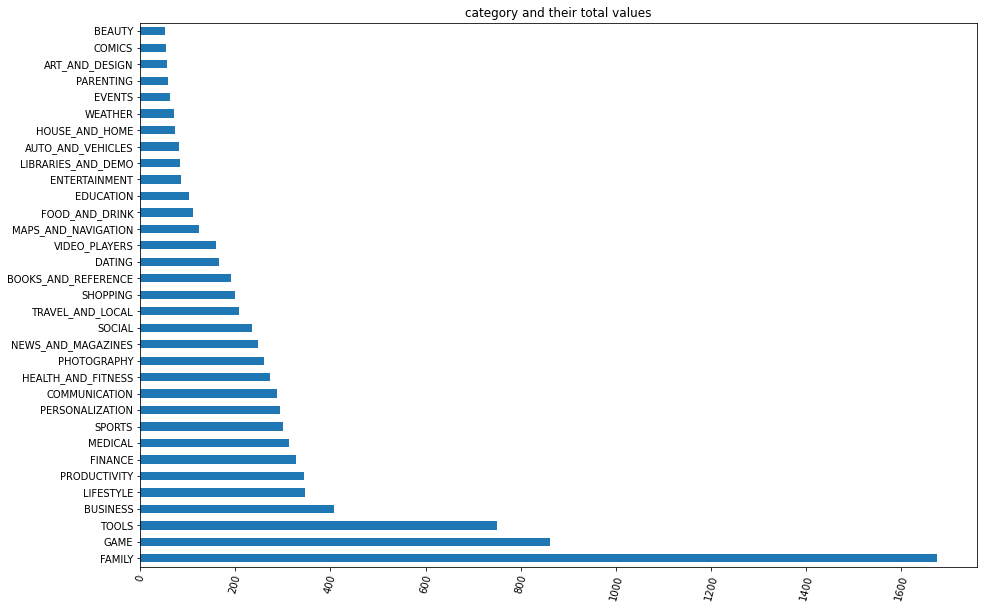

In [45]:
plt.figure(figsize=(15,10))
unique_category_total_values.plot.barh(title="category and their total values")
plt.xticks(rotation=75)
# plt.yticks(rotation=20)
plt.show()

In [46]:
categoryy=android_final["Category"].unique()

In [47]:
category_mean={}
for i in categoryy:
    df=android_final[android_final["Category"]==i]
    mean=df["Installs"].mean()
    category_mean[i]=mean

In [48]:
category_mean

{'SOCIAL': 23253652.127118643,
 'COMMUNICATION': 38456119.167247385,
 'GAME': 15594505.74912892,
 'TOOLS': 10801391.298666667,
 'VIDEO_PLAYERS': 24727872.452830188,
 'NEWS_AND_MAGAZINES': 9549178.467741935,
 'PHOTOGRAPHY': 17840110.40229885,
 'FAMILY': 3701608.406921241,
 'TRAVEL_AND_LOCAL': 13984077.710144928,
 'PERSONALIZATION': 5201482.6122448975,
 'MAPS_AND_NAVIGATION': 4056941.7741935486,
 'SHOPPING': 7036877.311557789,
 'ENTERTAINMENT': 11640705.88235294,
 'PRODUCTIVITY': 16787331.344927534,
 'HEALTH_AND_FITNESS': 4188821.9853479853,
 'SPORTS': 3638640.1428571427,
 'BOOKS_AND_REFERENCE': 8767811.894736841,
 'LIFESTYLE': 1437816.2687861272,
 'WEATHER': 5074486.197183099,
 'FINANCE': 1387692.475609756,
 'BUSINESS': 1712290.1474201474,
 'EDUCATION': 1833495.145631068,
 'FOOD_AND_DRINK': 1924897.7363636363,
 'COMICS': 817657.2727272727,
 'PARENTING': 542603.6206896552,
 'DATING': 854028.8303030303,
 'HOUSE_AND_HOME': 1331540.5616438356,
 'LIBRARIES_AND_DEMO': 638503.734939759,
 'ART_

In [49]:
category_means=android_final.groupby("Category")["Installs"].mean()

In [50]:
sorted_category=category_means.sort_values(ascending=False)

In [51]:
sorted_category

Category
COMMUNICATION          3.845612e+07
VIDEO_PLAYERS          2.472787e+07
SOCIAL                 2.325365e+07
PHOTOGRAPHY            1.784011e+07
PRODUCTIVITY           1.678733e+07
GAME                   1.559451e+07
TRAVEL_AND_LOCAL       1.398408e+07
ENTERTAINMENT          1.164071e+07
TOOLS                  1.080139e+07
NEWS_AND_MAGAZINES     9.549178e+06
BOOKS_AND_REFERENCE    8.767812e+06
SHOPPING               7.036877e+06
PERSONALIZATION        5.201483e+06
WEATHER                5.074486e+06
HEALTH_AND_FITNESS     4.188822e+06
MAPS_AND_NAVIGATION    4.056942e+06
FAMILY                 3.701608e+06
SPORTS                 3.638640e+06
ART_AND_DESIGN         1.986335e+06
FOOD_AND_DRINK         1.924898e+06
EDUCATION              1.833495e+06
BUSINESS               1.712290e+06
LIFESTYLE              1.437816e+06
FINANCE                1.387692e+06
HOUSE_AND_HOME         1.331541e+06
DATING                 8.540288e+05
COMICS                 8.176573e+05
AUTO_AND_VEHICLES  

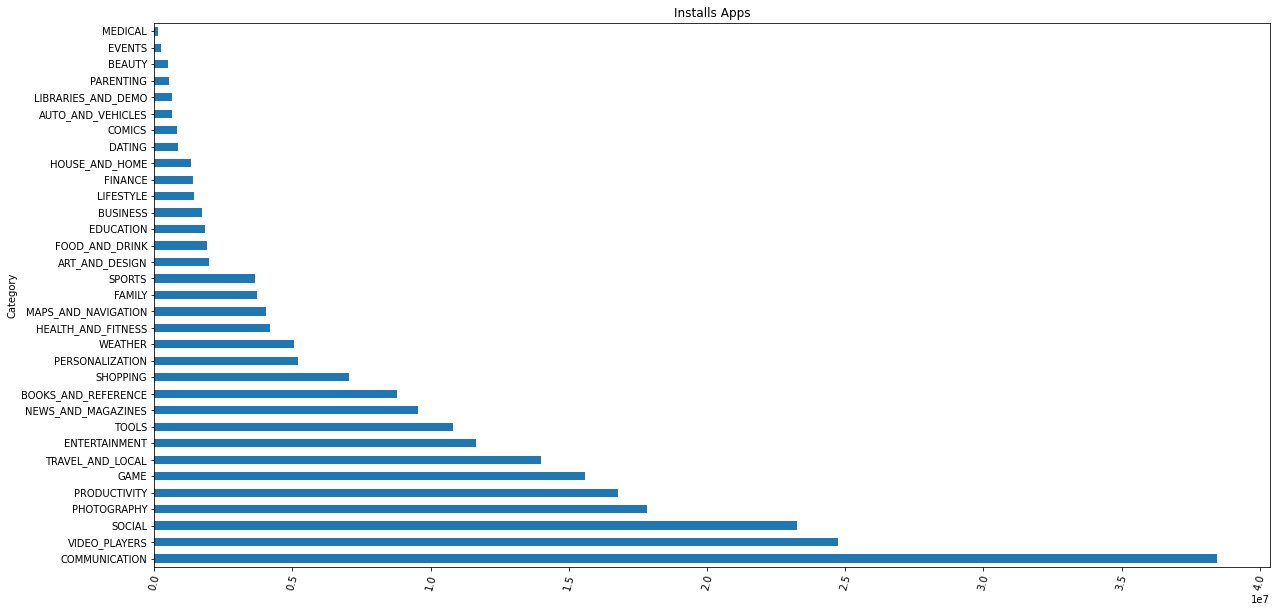

In [52]:
plt.figure(figsize=(20,10))
sorted_category.plot.barh(title="Installs Apps")
plt.xticks(rotation=75)
plt.show()

In [53]:
a=sorted_category.head(10)

In [54]:
a

Category
COMMUNICATION         3.845612e+07
VIDEO_PLAYERS         2.472787e+07
SOCIAL                2.325365e+07
PHOTOGRAPHY           1.784011e+07
PRODUCTIVITY          1.678733e+07
GAME                  1.559451e+07
TRAVEL_AND_LOCAL      1.398408e+07
ENTERTAINMENT         1.164071e+07
TOOLS                 1.080139e+07
NEWS_AND_MAGAZINES    9.549178e+06
Name: Installs, dtype: float64

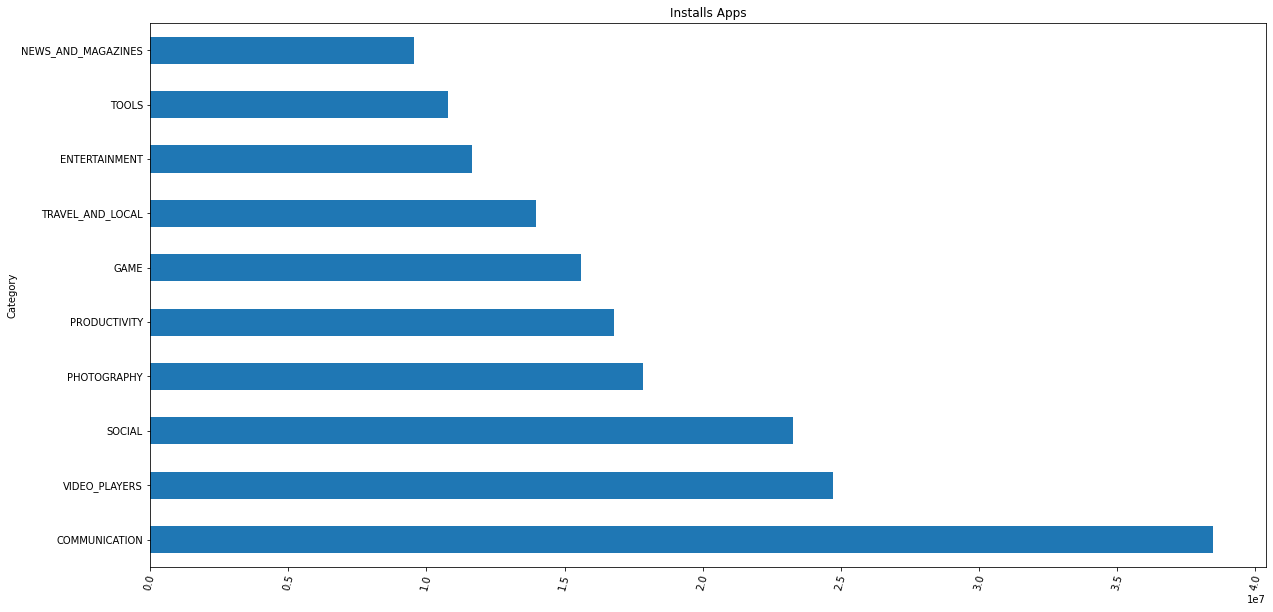

In [55]:
plt.figure(figsize=(20,10))
a.plot.barh(title="Installs Apps")
plt.xticks(rotation=75)
plt.show()

In [56]:
com=android_final[android_final["Category"]=="COMMUNICATION"]

In [57]:
b=com[["App","Installs"]].sort_values("Installs", ascending=False)

In [58]:
first_10=b.head(20)

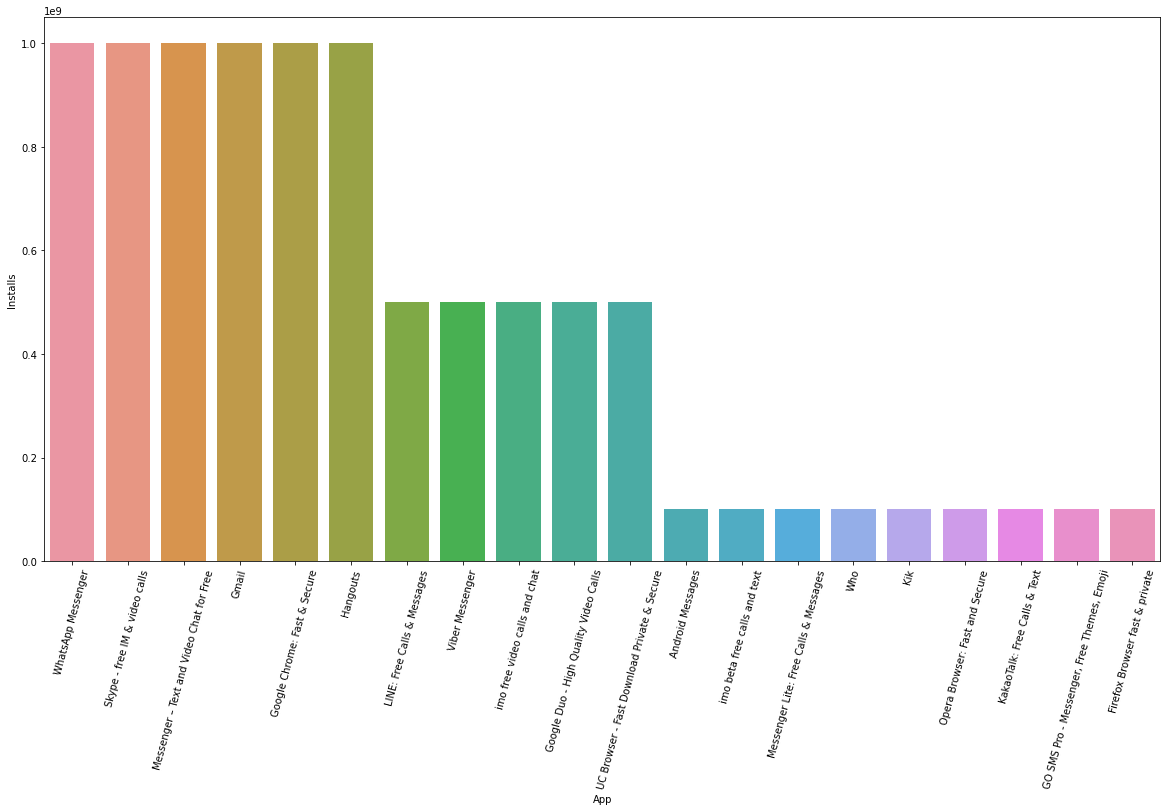

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x=first_10["App"],y=first_10["Installs"])
# a.plot.barh(title="Installs Apps")
plt.xticks(rotation=75)
plt.show()

In [61]:
android_final[android_final["Category"]=="COMMUNICATION"]

,App,Category,Rating,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1000000000,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850.0,40M,500000000,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436.0,Varies with device,100000000,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
4676,Viber Messenger,COMMUNICATION,4.3,11335481.0,Varies with device,500000000,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
6399,Of the wall Arapaho bk,COMMUNICATION,NaN,0.0,12M,5,Everyone,Communication,"August 18, 2017",1.0,4.1 and up
6328,BJ - Confidential,COMMUNICATION,NaN,0.0,3.2M,10,Teen,Communication,"April 23, 2018",1.7,4.1 and up
8556,DM - The Offical Messaging App,COMMUNICATION,NaN,0.0,11M,10,Teen,Communication,"December 20, 2017",1.3,4.0.3 and up
10439,Carpooling FH Hagenberg,COMMUNICATION,NaN,0.0,Varies with device,100,Everyone,Communication,"May 18, 2017",Varies with device,Varies with device
